<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[6차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ ROI (Region of Image)를 자르고 표시하는 방법에 대해 학습한다.<br>
○ 한글을 출력하는 방법에 대해 학습한다.<br>
○ 비트 연산으로 이미지를 합성하는 방법을 학습한다.

</font></td></tr>   
</table>

# 픽셀/블록 기반 이미지 처리

## ROI (Region of Image) 자르기

- ROI (Region of Image) 
   - 관심영역 - 이미지에 우리가 필요한 부분 (얼굴, 눈 ...)
   
<img src="./lecture_image/06_roi.png" width=30%>  


- <font color=red>img[200:370, 200:350]</font>

<img src="./lecture_image/06_roi2.png" width=60%>  


(-0.5, 799.5, 1119.5, -0.5)

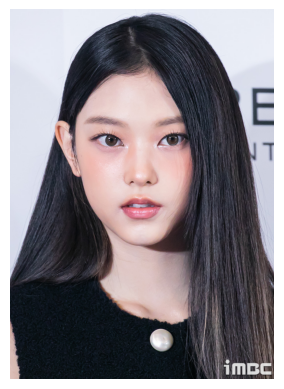

In [3]:
#실습
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./images/hl.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')

(-0.5, 518.5, 595.5, -0.5)

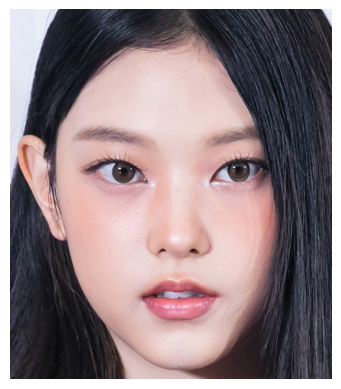

In [4]:
# 좌상단좌표 (124 153)
# 우하단좌표 (643 731)

roi_img = img[135:731, 124:643]

plt.imshow(roi_img)
plt.axis('off')

## ROI에 도형 그리기

- <font color=red>cv2.line(배경이미지, 시작점좌표, 끝점좌표, 색상, 선두께)</font> : 직선 그리기

<img src="./lecture_image/06_line.png" width=40%>  

(-0.5, 799.5, 1119.5, -0.5)

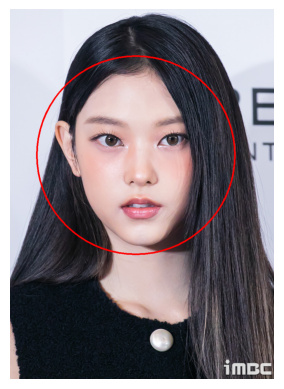

In [12]:
#실습
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./images/hl.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.circle(img, (381,442),300, (255,0,0), 3) # -1 채운도형
plt.imshow(img)
plt.axis('off')

- <font color=red>cv2.circle(배경이미지, 중심좌표, 반지름, 색상, 선두께)</font> : 원 그리기

<img src="./lecture_image/06_circle.png" width=20%>  

(-0.5, 799.5, 1119.5, -0.5)

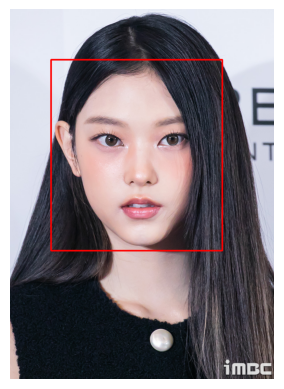

In [6]:
#실습
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./images/hl.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.rectangle(img, (124,153), (643, 731), (255,0,0), 3)
plt.imshow(img)
plt.axis('off')


- <font color=red>cv2.rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께)</font> : 사각형 그리기

<img src="./lecture_image/06_rectangle.png" width=30%>  

(-0.5, 799.5, 1119.5, -0.5)

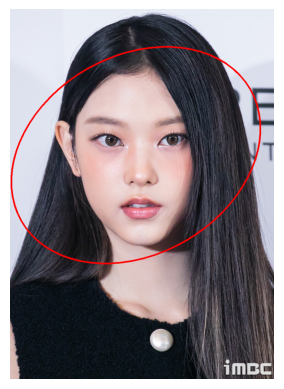

In [24]:
#실습
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./images/hl.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.ellipse(img, (381,442), (300, 400),60, 0, 360, (255,0,0), 3)

plt.imshow(img)
plt.axis('off')

- <font color=red>cv2.ellipse(배경이미지, 중심좌표, 장축/단축 반지름, 기울기, 호의시작각, 호의 종료각, 색상, 선두께)</font> : 타원 그리기

<img src="./lecture_image/06_ellipse.png" width=30%>  

(-0.5, 799.5, 1119.5, -0.5)

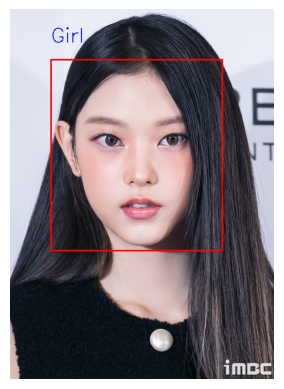

In [33]:
#실습
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./images/hl.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.rectangle(img, (124,153), (643, 731), (255,0,0), 3)
cv2.putText(img,'Girl',(124,100),cv2.FONT_HERSHEY_SIMPLEX,
           2,(0,0,255),2)
plt.imshow(img)
plt.axis('off')

- <font color=red>cv2.putText(배경이미지, 출력내용, 출력시작좌표, 폰트, 크기, 색상, 굵기)</font> : 텍스트 그리기

<img src="./lecture_image/06_text.png" width=30%>  

(-0.5, 799.5, 1119.5, -0.5)

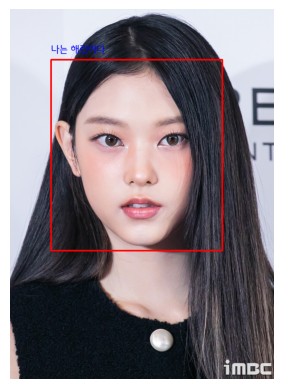

In [40]:
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import numpy as np

# 30 : 폰트 크기
img = cv2.imread('./images/hl.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.rectangle(img, (124,153), (643, 731), (255,0,0), 3)

font =ImageFont.truetype('./font/MALANGMALANGR.TTF',30)
pil_img = Image.fromarray(img)
draw =ImageDraw.Draw(pil_img)

draw.text((124,100),"나는 해린이다",font = font,
          fill=(0,0,255,0))
img = np.array(pil_img)

plt.imshow(img)
plt.axis('off')

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 이미지에 ROI 영역을 표시하고 이름을 출력해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/06_ryan.png" width=20%></td></tr>   
</table>

## 한글 출력하기

- c:/Windows/Fonts 폴더에서 사용할 폰트를 현재 폴더에 fonts 폴더를 생성하고 복사한다


- <font color=red>font = ImageFont.truetype("fonts/gulim.ttc", 30)</font> : 사용할 폰트와 크기를 가져온다

- <font color=red>img_pil = Image.fromarray(img)</font> : array 이미지를 PIL 이미지로 변환

- <font color=red>draw = ImageDraw.Draw(img_pil)</font> : PIL 이미지를 그림

- <font color=red>draw.text((200, 20), "레나 이미지", font=font, fill=(0, 0, 255, 0))</font> : 이미지에 텍스트를 그림

- <font color=red>img = np.array(img_pil)</font> : PIL 이미지를 numpy 배열로 변환

In [4]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 다른 폰트의 한글을 출력해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/06_ryan2.png" width=20%></td></tr>   
</table>

# 이미지 합성하기

## 비트 연산을 이용해서 합성하기

In [2]:
#실습

In [1]:
#실습

- <font color=red>cv2.bitwise_not(mask)</font>
  - mask는 흑백이미지여야 함
  - 0을 255로 255롤 0으로 변환 (반전)

In [3]:
#실습

- <font color=red>cv2.bitwise_and(src1, src2, mask)></font> : mask의 값이 아닌 부분만 src1과 src2를 AND 연산
  - mask는 흑백이미지여야 함
  - mask 값이 0인 부분 (검정)은 연산되지 않고 검정색 부분 그대로 놓여짐

In [11]:
#실습

In [12]:
#실습

In [13]:
#실습

<table border=1>
    <tr><td colspan=3 style="border: 1px solid black; width:600px; text-align: left;">
        <font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=2>○ 다음과 같이 2개의 이미지를 합성해보자.</font></td></tr> 
    <tr>
        <td style="border: 1px solid black;">
        <img src="./lecture_image/06_ryan_cap2.png" width=80%></td>        
    </tr>       
</table>

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[6차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=2>
○ ROI (Region of Image) : 관심영역을 의미<br>
○ line() - 선그리기<br> 
○ circle() - 원 그리기<br> 
○ rectangle() - 사각형 그리기<br> 
○ ellipse() - 타원 그리기<br> 
○ putText() - 문자 출력<br>

○ bitwise_not() : 반전 연산<br>
○ bitwise_and() : AND 연산<br>
○ add() : 2개 이미지 합치기<br>         
        </font></td></tr>   
</table>